In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit

In [9]:
pilha = np.loadtxt("pilha.txt")
I_pilha, U_pilha, I_err = pilha[:,0] , pilha[:,1], pilha[:,2]
celula = np.loadtxt("celula.txt")
U_celula, I_celula, sigma_U, sigma_I = celula[:,0], celula[:,1], celula[:,2], celula[:,3]

In [10]:
U_pilha
def chi2(Omega_m, h_0):
    return np.sum((dist_mod-Mod_dist(Omega_m, h_0))**2/dist_err**2)

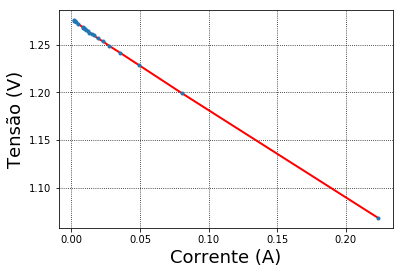

In [11]:
pl.plot(I_pilha, U_pilha, c='r', lw=2)
pl.errorbar(I_pilha, U_pilha, xerr=I_err, fmt='.')
pl.xlabel(r'Corrente (A)', fontsize=18)
pl.ylabel(r'Tensão (V)', fontsize=18)
pl.grid(ls=':',c='k')

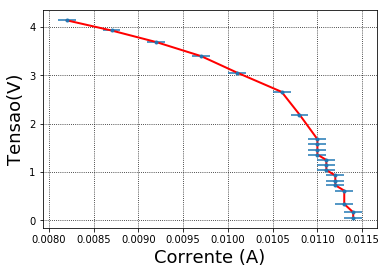

In [14]:
pl.plot(I_celula, U_celula, c='r', lw=2)
pl.errorbar(I_celula, U_celula, xerr=sigma_I, yerr=sigma_U, fmt='.')
pl.ylabel(r'Tensao(V)', fontsize=18)
pl.xlabel(r'Corrente (A)', fontsize=18)
pl.grid(ls=':',c='k')

In [20]:
def ajuste_exp(x, a, b, c):
    return a + (b*np.exp(c*x)-1)

fitparameter, fiterros = curve_fit(ajuste_exp, I_celula, U_celula, sigma=sigma_I)
pl.plot((ajuste_exp(I_celula, *fitparameter) - U_celula)**2)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [55]:
chi2 = np.zeros(100)
r_vec = np.linspace(0.1,10,len(U_pilha))
def r_calc(u,i):
    return u/i
chi2 = np.zeros(len(r_vec))
def chi2_calc(u,i):
    return np.sum((4.7284-r_calc(u,i))**2/0.0003**2)

In [56]:
for i in range(len(r_vec)):
    chi2[i]=chi2_calc(U_pilha[i], I_pilha[i])

In [58]:
chi2min_q_f = np.min(chi2)
index_q_f = np.argwhere(chi2==chi2min_q_f)
print(r_vec[index_q_f])

[[0.1]]


In [65]:
R=np.zeros(len(U_pilha))
for i in range(len(R)):
    R[i]=(1/0.0003)**2 * (4.7284-r_calc(U_pilha[i], I_pilha[i]))**2

In [66]:
R

array([2.75130078e+04, 1.13914199e+09, 4.61658401e+09, 1.03946853e+10,
       1.83330767e+10, 2.84352175e+10, 4.16082030e+10, 5.68309902e+10,
       7.39834849e+10, 9.60975472e+10, 1.15357659e+11, 1.40471689e+11,
       1.66765373e+11, 2.00873428e+11, 2.33274832e+11, 2.59742300e+11,
       7.29931703e+11, 1.53018220e+12, 2.74202247e+12, 3.96104995e+12,
       6.21856629e+12])